In [97]:
from problems.golomb_simple import udp
import random 
import numpy as np
import copy    # array-copying convenience

from pyMetaheuristic.algorithm import improved_grey_wolf_optimizer, adaptive_chaotic_grey_wolf_optimizer

In [ ]:
def fitness_get(x):
    return udp.fitness(x)[0]+1 

## Grey Wolf optimizer
GWO No libs : https://www.geeksforgeeks.org/implementation-of-grey-wolf-optimization-gwo-algorithm/ 

GWO libs : https://pypi.org/project/pyMetaheuristic/

### Simple Grey Wolf Optimizer (NO libs)
['-0.000599', '-0.007124', '0.002772', '0.005313', '-0.007049', '0.032415', '-0.289797', '0.060649', '-0.319332', '-0.368774', '-0.037936', '-0.173303', '-0.194020', '0.009454', '0.145101', '0.065171', '-0.122505', '0.069189', '-0.445443', '0.074369', '-0.007291', '-0.032741', '0.039555', '-0.003120', '-0.000946', '-0.002305', '-0.056462', '0.079689', '-0.015379', '0.083645']

In [99]:
class wolf: 
  def __init__(self, fitness, dim, minx, maxx, seed): 
    self.rnd = random.Random(seed) 
    self.position = [0.0 for i in range(dim)] 
  
    for i in range(dim): 
      self.position[i] = ((maxx - minx) * self.rnd.random() + minx) 
  
    self.fitness = fitness(self.position) # curr fitness 
  
  
  
# grey wolf optimization (GWO) 
def gwo(fitness, max_iter, n, dim, minx, maxx): 
    rnd = random.Random(0) 
  
    # create n random wolves  
    population = [ wolf(fitness, dim, minx, maxx, i) for i in range(n)] 
  
    # On the basis of fitness values of wolves  
    # sort the population in asc order 
    population = sorted(population, key = lambda temp: temp.fitness) 
  
    # best 3 solutions will be called as  
    # alpha, beta and gaama 
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3]) 
  
  
    # main loop of gwo 
    Iter = 0
    while Iter < max_iter: 
  
        # after every 10 iterations  
        # print iteration number and best fitness value so far 
        if Iter % 10 == 0 and Iter > 1: 
            print("Iter = " + str(Iter) + " best fitness = %.3f" % alpha_wolf.fitness) 
  
        # linearly decreased from 2 to 0 
        a = 2*(1 - Iter/max_iter) 
  
        # updating each population member with the help of best three members  
        for i in range(n): 
            A1, A2, A3 = a * (2 * rnd.random() - 1), a * ( 
              2 * rnd.random() - 1), a * (2 * rnd.random() - 1) 
            C1, C2, C3 = 2 * rnd.random(), 2*rnd.random(), 2*rnd.random() 
  
            X1 = [0.0 for i in range(dim)] 
            X2 = [0.0 for i in range(dim)] 
            X3 = [0.0 for i in range(dim)] 
            Xnew = [0.0 for i in range(dim)] 
            for j in range(dim): 
                X1[j] = alpha_wolf.position[j] - A1 * abs( 
                  C1 * alpha_wolf.position[j] - population[i].position[j]) 
                X2[j] = beta_wolf.position[j] - A2 * abs( 
                  C2 *  beta_wolf.position[j] - population[i].position[j]) 
                X3[j] = gamma_wolf.position[j] - A3 * abs( 
                  C3 * gamma_wolf.position[j] - population[i].position[j]) 
                Xnew[j]+= X1[j] + X2[j] + X3[j] 
              
            for j in range(dim): 
                Xnew[j]/=3.0
              
            # fitness calculation of new solution 
            fnew = fitness(Xnew) 
  
            # greedy selection 
            if fnew < population[i].fitness: 
                population[i].position = Xnew 
                population[i].fitness = fnew 
                  
        # On the basis of fitness values of wolves  
        # sort the population in asc order 
        population = sorted(population, key = lambda temp: temp.fitness) 
  
        # best 3 solutions will be called as  
        # alpha, beta and gaama 
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3]) 
          
        Iter+= 1
    # end-while 
  
    # returning the best solution 
    return alpha_wolf.position 

In [100]:
print("\nBegin grey wolf optimization on rastrigin function\n") 
dim = 30

num_particles = 80
max_iter = 150
  
print("Setting num_particles = " + str(num_particles)) 
print("Setting max_iter    = " + str(max_iter)) 
print("\nStarting GWO algorithm\n") 

best_position_gwo = gwo(fitness_get, max_iter, num_particles, dim, -1, 1)  # noqa: F821
  
print("\nGWO completed\n") 
print("\nBest solution found:") 
print(["%.6f"%best_position_gwo[k] for k in range(dim)]) 
fitness_minimum_gwo = fitness_get(best_position_gwo)  # noqa: F821
print("fitness of best solution = %.6f" % fitness_minimum_gwo) 
  
print("\nEnd GWO for rastrigin\n") 
  


Begin grey wolf optimization on rastrigin function

Setting num_particles = 80
Setting max_iter    = 150

Starting GWO algorithm

Iter = 10 best fitness = 0.925
Iter = 20 best fitness = 0.907
Iter = 30 best fitness = 0.907
Iter = 40 best fitness = 0.898
Iter = 50 best fitness = 0.898
Iter = 60 best fitness = 0.898
Iter = 70 best fitness = 0.898
Iter = 80 best fitness = 0.898
Iter = 90 best fitness = 0.898
Iter = 100 best fitness = 0.898
Iter = 110 best fitness = 0.898
Iter = 120 best fitness = 0.898
Iter = 130 best fitness = 0.898
Iter = 140 best fitness = 0.898

GWO completed


Best solution found:
['-0.000599', '-0.007124', '0.002772', '0.005313', '-0.007049', '0.032415', '-0.289797', '0.060649', '-0.319332', '-0.368774', '-0.037936', '-0.173303', '-0.194020', '0.009454', '0.145101', '0.065171', '-0.122505', '0.069189', '-0.445443', '0.074369', '-0.007291', '-0.032741', '0.039555', '-0.003120', '-0.000946', '-0.002305', '-0.056462', '0.079689', '-0.015379', '0.083645']
fitness of be

XY


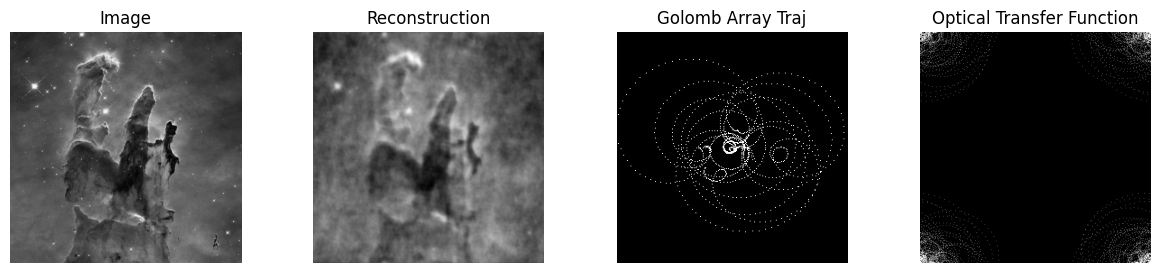

XZ


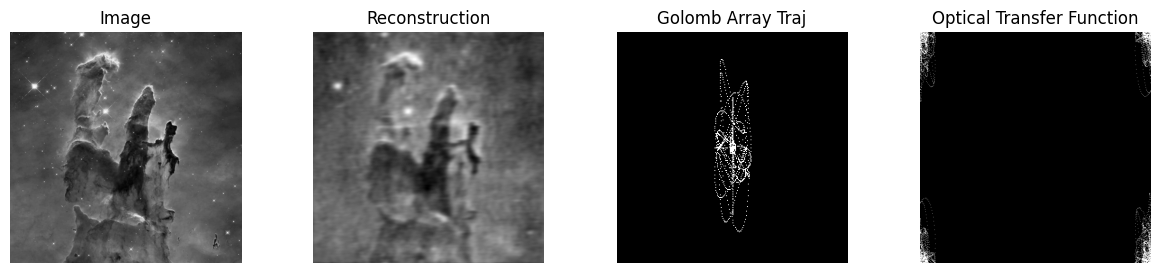

YZ


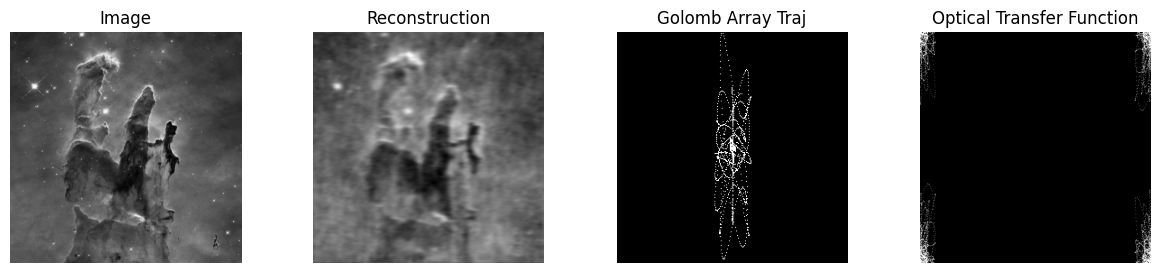

In [101]:
N_obs = 300
udp.plot_simulated_reconstruction(best_position_gwo, N_obs, image_path="../data/nebula.jpg")

### Improve Grey Wolf Optimizer (Using Libs)

In [102]:
parameters = {
    'pack_size': 25,
    'min_values': [-1]*30,
    'max_values': [1]*30,
    'iterations': 1500,
	  'verbose': True,
	  'start_init': None,
	  'target_value': None
}

igwo = improved_grey_wolf_optimizer(target_function = fitness_get, **parameters)  # noqa: F821


Iteration =  0  f(x) =  0.9931972789115646
Iteration =  1  f(x) =  0.9931972789115646
Iteration =  2  f(x) =  0.9795918367346939
Iteration =  3  f(x) =  0.9795918367346939
Iteration =  4  f(x) =  0.9795918367346939
Iteration =  5  f(x) =  0.9795918367346939
Iteration =  6  f(x) =  0.9795918367346939
Iteration =  7  f(x) =  0.9795918367346939
Iteration =  8  f(x) =  0.9795918367346939
Iteration =  9  f(x) =  0.9795918367346939
Iteration =  10  f(x) =  0.9795918367346939
Iteration =  11  f(x) =  0.9795918367346939
Iteration =  12  f(x) =  0.9795918367346939
Iteration =  13  f(x) =  0.9795918367346939
Iteration =  14  f(x) =  0.9795918367346939
Iteration =  15  f(x) =  0.9795918367346939
Iteration =  16  f(x) =  0.9795918367346939
Iteration =  17  f(x) =  0.9523809523809523
Iteration =  18  f(x) =  0.9523809523809523
Iteration =  19  f(x) =  0.9523809523809523
Iteration =  20  f(x) =  0.9523809523809523
Iteration =  21  f(x) =  0.9523809523809523
Iteration =  22  f(x) =  0.952380952380952

In [103]:
best_position_igwo = igwo[:-1]
fitness_minimum_igwo   = igwo[ -1]
print('Variables: ', np.around(best_position_igwo, 4) , ' Minimum Value Found: ', round(fitness_minimum_igwo, 4) )

Variables:  [ 0.0037  0.2323  0.0121 -0.0222  0.0417 -0.3808 -0.6849 -0.0576 -0.5171
  0.0407  0.1495  0.013  -0.0605 -0.9724  0.8171 -0.6677 -0.4208 -0.716
 -1.     -0.067  -0.0241  0.64    0.008  -0.0219  0.1282 -1.     -0.332
 -0.3288  0.195  -1.    ]  Minimum Value Found:  0.8571


XY


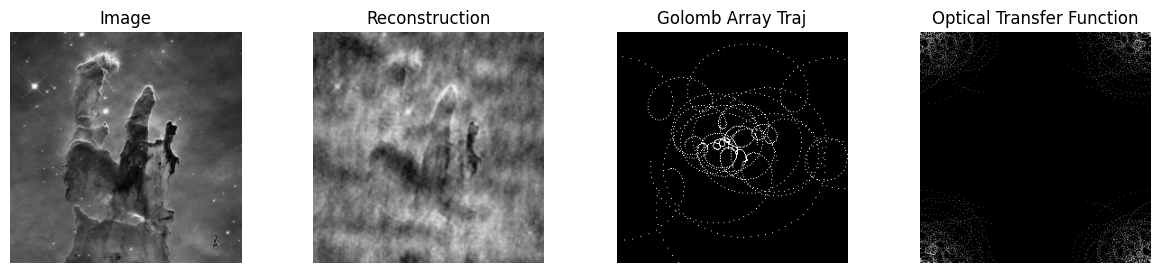

XZ


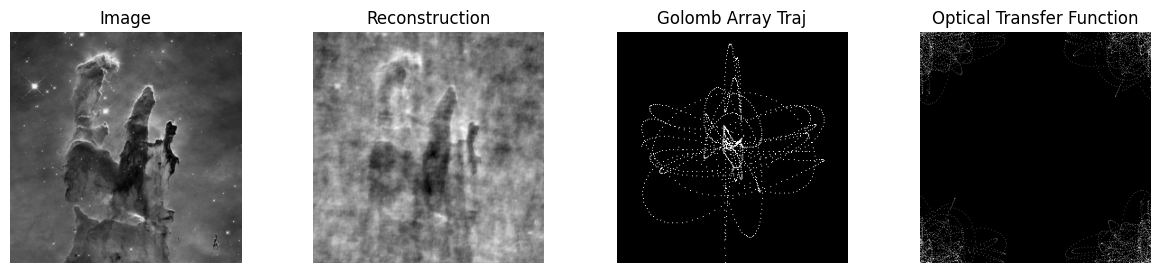

YZ


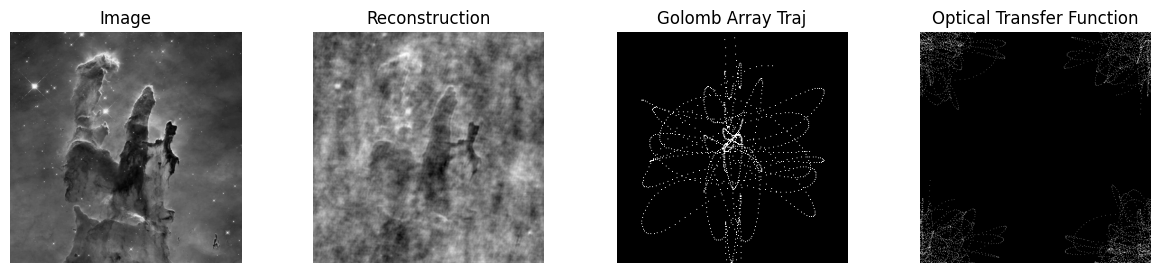

In [104]:
N_obs = 300
udp.plot_simulated_reconstruction(best_position_igwo, N_obs, image_path="../data/nebula.jpg")

### Adaptive Chaotic Grey Wolf Optimizer (Using Libs)

In [105]:
parameters = {
    'size': 25,
    'min_values': [-1]*30,
    'max_values': [1]*30,
    'iterations': 1500,
    'lmbda': 0.3,
	  'verbose': True,
	  'start_init': None,
	  'target_value': None
}

acgwo = adaptive_chaotic_grey_wolf_optimizer(target_function = fitness_get, **parameters)  # noqa: F821


Iteration =  0  f(x) =  0.9931972789115646
Iteration =  1  f(x) =  0.9931972789115646
Iteration =  2  f(x) =  0.9931972789115646
Iteration =  3  f(x) =  0.9931972789115646
Iteration =  4  f(x) =  0.9795918367346939
Iteration =  5  f(x) =  0.9795918367346939
Iteration =  6  f(x) =  0.9795918367346939
Iteration =  7  f(x) =  0.9795918367346939
Iteration =  8  f(x) =  0.9795918367346939
Iteration =  9  f(x) =  0.9795918367346939
Iteration =  10  f(x) =  0.9795918367346939
Iteration =  11  f(x) =  0.9795918367346939
Iteration =  12  f(x) =  0.9795918367346939
Iteration =  13  f(x) =  0.9795918367346939
Iteration =  14  f(x) =  0.9795918367346939
Iteration =  15  f(x) =  0.9795918367346939
Iteration =  16  f(x) =  0.9795918367346939
Iteration =  17  f(x) =  0.9795918367346939
Iteration =  18  f(x) =  0.9795918367346939
Iteration =  19  f(x) =  0.9795918367346939
Iteration =  20  f(x) =  0.9795918367346939
Iteration =  21  f(x) =  0.9795918367346939
Iteration =  22  f(x) =  0.979591836734693

In [106]:
best_position_acgwo = acgwo[:-1]
fitness_minimum_acgwo   = acgwo[ -1]
print('Variables: ', np.around(best_position_acgwo, 4) , ' Minimum Value Found: ', round(fitness_minimum_acgwo, 4) )

Variables:  [-0.3785  0.0038  0.2666 -0.0436 -0.3816  0.0072  0.1333  0.0814 -0.2215
  0.2919 -0.3464 -0.6563  0.3907 -0.0673  0.1078 -0.4306  0.4218  0.4004
 -0.3777 -0.8342 -1.     -0.037   0.6812 -0.1762 -1.      0.4773  0.1531
 -0.3376  0.0908  0.7676]  Minimum Value Found:  0.8571


XY


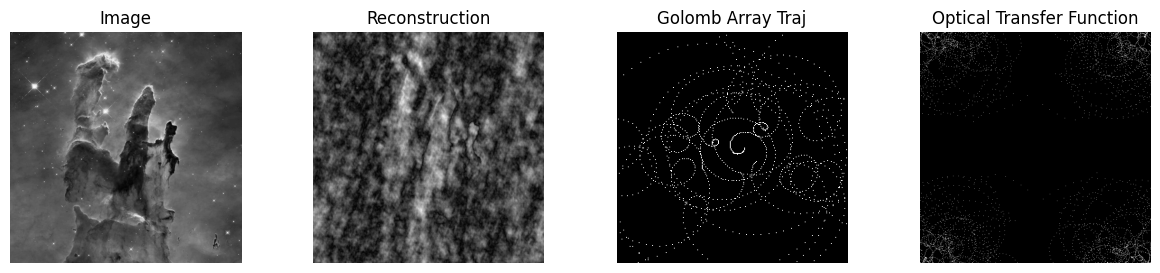

XZ


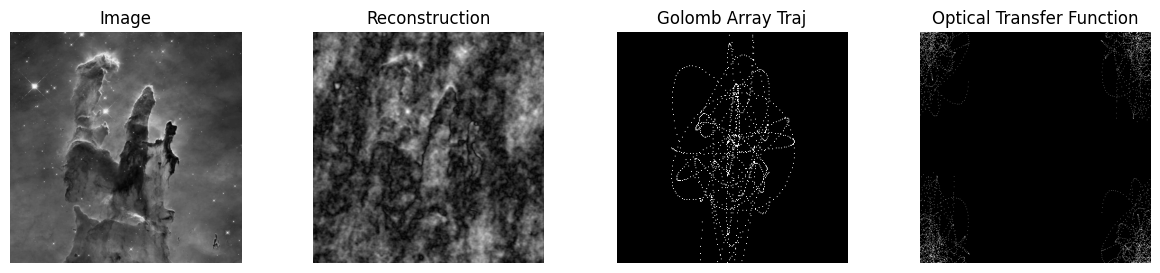

YZ


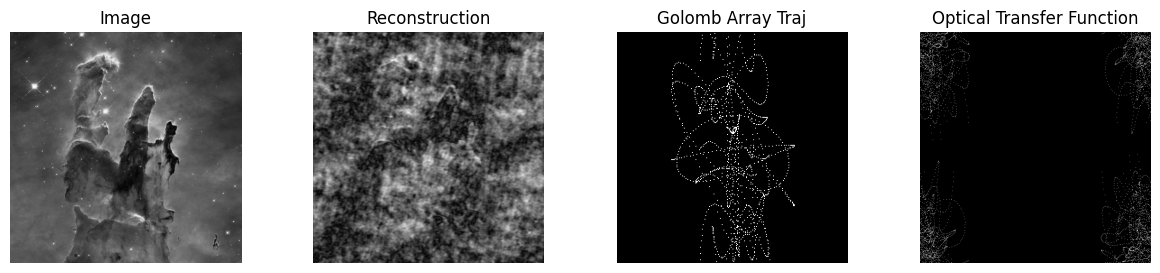

In [107]:
N_obs = 300
udp.plot_simulated_reconstruction(best_position_acgwo, N_obs, image_path="../data/nebula.jpg")

0.8979591836734694
XY


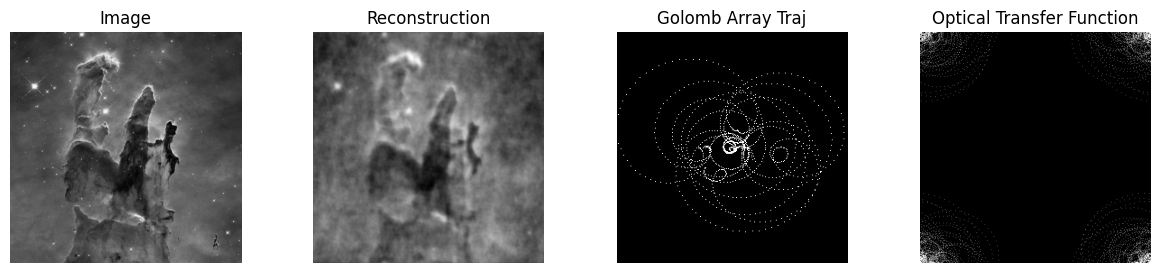

XZ


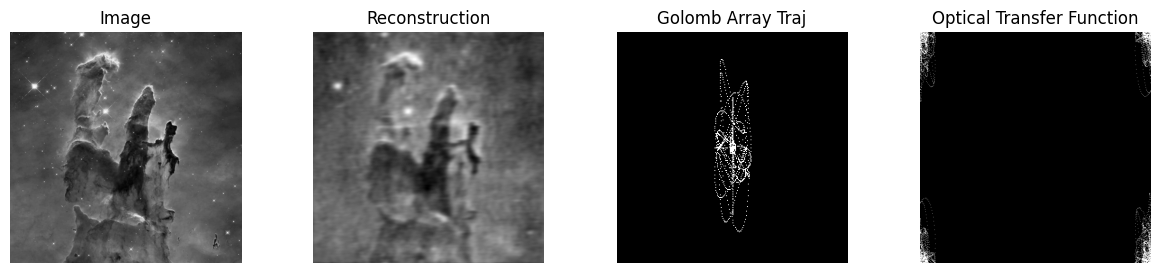

YZ


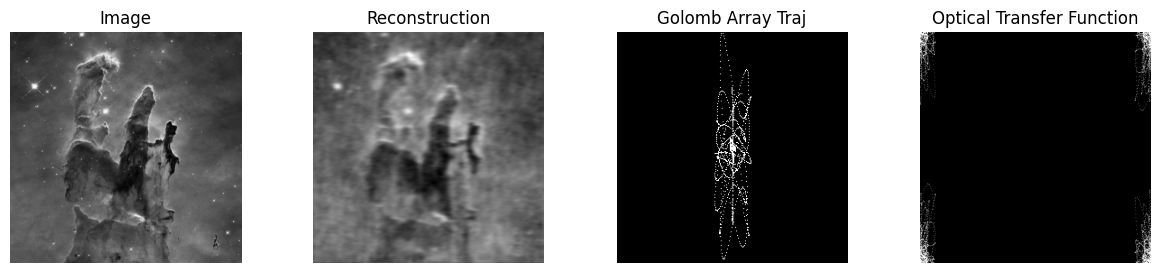

In [108]:
from scipy.optimize import minimize

a = minimize(fitness_get, best_position_gwo, method='L-BFGS-B', bounds=[(-1.0,1.0)]*30)
print(fitness_get(a.x))
udp.plot_simulated_reconstruction(a.x, N_obs, image_path="../data/nebula.jpg")

In [111]:
Best_solution = best_position_gwo
print(best_position_gwo)

[-0.0005993197961936305, -0.007123959311528986, 0.0027717428080718093, 0.005313131363156541, -0.007048525555327201, 0.03241542857141983, -0.2897974144840736, 0.06064873926268719, -0.3193319231863915, -0.3687736772600707, -0.03793614220418778, -0.17330272370484404, -0.19402020224426886, 0.009454474480286568, 0.14510053089848898, 0.06517087786890022, -0.12250496332109541, 0.0691887761509228, -0.44544327742829165, 0.07436895997461783, -0.007291019474042222, -0.03274079455957742, 0.03955534921410549, -0.0031201557259832266, -0.0009464921802483234, -0.002305183713479884, -0.056462449311021436, 0.07968871481971276, -0.015379175762341102, 0.08364495095765105]
